In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


2025-01-17 02:55:36.847708: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-17 02:55:37.031190: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-17 02:55:37.031254: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-01-17 02:55:37.067683: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 02:55:38.338895: W tensorflow/stream_executor/platform/de

In [2]:
df= pd.read_csv("df_lstm_ts.csv")

In [3]:
df

,api_call_datetime_hourly,num_bikes_available,precip,temp,snow,feelslike,windgust
0,2024-11-15 13:00:00,14,0.000,50.6,0.0,50.6,9.8
1,2024-11-15 14:00:00,53,0.000,51.0,0.0,51.0,8.7
2,2024-11-15 15:00:00,48,0.000,50.7,0.0,50.7,10.4
3,2024-11-15 16:00:00,75,0.000,49.9,0.0,49.9,8.3
4,2024-11-15 17:00:00,80,0.000,49.1,0.0,49.1,7.2
...,...,...,...,...,...,...,...
548,2024-12-08 09:00:00,146,0.008,46.4,0.0,39.6,38.3
549,2024-12-08 10:00:00,110,0.000,46.3,0.0,38.8,33.6
550,2024-12-08 11:00:00,104,0.039,46.4,0.0,39.8,33.9
551,2024-12-08 12:00:00,111,0.020,46.4,0.0,39.4,33.8


In [4]:
merged_df_train_seasonalized = df

In [5]:
merged_df_train_seasonalized.set_index("api_call_datetime_hourly",inplace=True)

In [6]:
serie_sarimax = merged_df_train_seasonalized["num_bikes_available"]
exo_sarimax = merged_df_train_seasonalized.drop("num_bikes_available",axis =1)
y_train_sarimax = serie_sarimax[:387]
y_test_sarimax = serie_sarimax[387:]
exo_train = merged_df_train_seasonalized.drop("num_bikes_available",axis =1)[:387]
exo_test = merged_df_train_seasonalized.drop("num_bikes_available",axis =1)[387:]

# LSTM 

2025-01-17 02:55:39.693232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-01-17 02:55:39.693299: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-01-17 02:55:39.693330: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LeCoonDevice): /proc/driver/nvidia/version does not exist
2025-01-17 02:55:39.693679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
13/13 [==============================] - 4s 80ms/step - loss: 0.0860 - val_loss: 0.0732
Epoch 2/20
13/13 [==============================] - 1s 41ms/step - loss: 0.0553 - val_loss: 0.0710
Epoch 3/20
13/13 [==============================] - 1s 42ms/step - loss: 0.0491 - val_loss: 0.0623
Epoch 4/20
13/13 [==============================] - 1s 43ms/step - loss: 0.0469 - val_loss: 0.0616
Epoch 5/20
13/13 [==============================] - 1s 41ms/step - loss: 0.0438 - val_loss: 0.0539
Epoch 6/20
13/13 [==============================] - 1s 42ms/step - loss: 0.0386 - val_loss: 0.0461
Epoch 7/20
13/13 [==============================] - 1s 39ms/step - loss: 0.0312 - val_loss: 0.0426
Epoch 8/20
13/13 [==============================] - 1s 42ms/step - loss: 0.0351 - val_loss: 0.0325
Epoch 9/20
13/13 [==============================] - 1s 39ms/step - loss: 0.0244 - val_loss: 0.0202
Epoch 10/20
13/13 [==============================] - 1s 44ms/step - loss: 0.0165 - val_loss: 0.0269
Epoch 11/

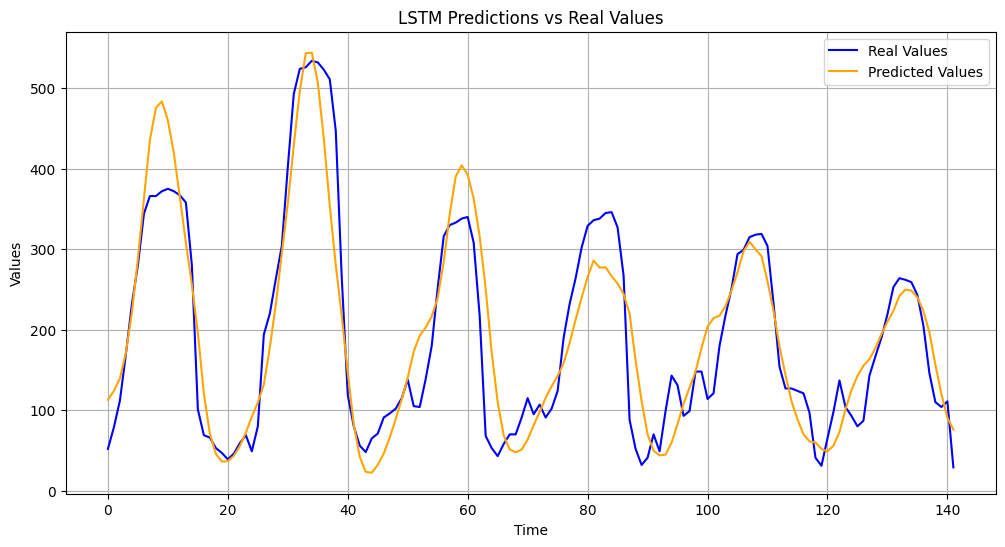

In [7]:

# Assuming the data structure from your SARIMAX example:
# `serie_sarimax` is the target series, and `merged_df_train_seasonalized` contains exogenous variables.

# Data Preparation
scaler = MinMaxScaler()

# Scaling the target variable
serie_scaled = scaler.fit_transform(serie_sarimax.values.reshape(-1, 1))

# Preparing the input features (target and exogenous variables)
features = merged_df_train_seasonalized.values
features_scaled = MinMaxScaler().fit_transform(features)

# Defining a lookback window (e.g., 24 time steps)
lookback = 24
X, y = [], []

for i in range(lookback, len(serie_scaled)):
    X.append(features_scaled[i - lookback:i])  # Collecting features for each window
    y.append(serie_scaled[i])  # Target variable at time t

X, y = np.array(X), np.array(y)

# Train-test split
split_index = 387  # From your SARIMAX example
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(lookback, X.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Making predictions
y_pred = model.predict(X_test)

# Rescaling predictions back to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Real Values", color="blue")
plt.plot(y_pred_rescaled, label="Predicted Values", color="orange")
plt.title("LSTM Predictions vs Real Values")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [9]:
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)

In [10]:
mae, mse, mape

(39.71869632559763, 2763.5720518135195, 0.3357350280242506)

# GRU / Bidirectional 

Epoch 1/200
10/10 [==============================] - 4s 109ms/step - loss: 0.0849 - mae: 0.2245 - mse: 0.0849 - val_loss: 0.0403 - val_mae: 0.1591 - val_mse: 0.0403
Epoch 2/200
10/10 [==============================] - 1s 54ms/step - loss: 0.0576 - mae: 0.1985 - mse: 0.0576 - val_loss: 0.0405 - val_mae: 0.1563 - val_mse: 0.0405
Epoch 3/200
10/10 [==============================] - 1s 55ms/step - loss: 0.0515 - mae: 0.1927 - mse: 0.0515 - val_loss: 0.0335 - val_mae: 0.1479 - val_mse: 0.0335
Epoch 4/200
10/10 [==============================] - 1s 52ms/step - loss: 0.0474 - mae: 0.1879 - mse: 0.0474 - val_loss: 0.0293 - val_mae: 0.1399 - val_mse: 0.0293
Epoch 5/200
10/10 [==============================] - 1s 52ms/step - loss: 0.0417 - mae: 0.1765 - mse: 0.0417 - val_loss: 0.0242 - val_mae: 0.1281 - val_mse: 0.0242
Epoch 6/200
10/10 [==============================] - 0s 50ms/step - loss: 0.0343 - mae: 0.1536 - mse: 0.0343 - val_loss: 0.0165 - val_mae: 0.1020 - val_mse: 0.0165
Epoch 7/200
10/

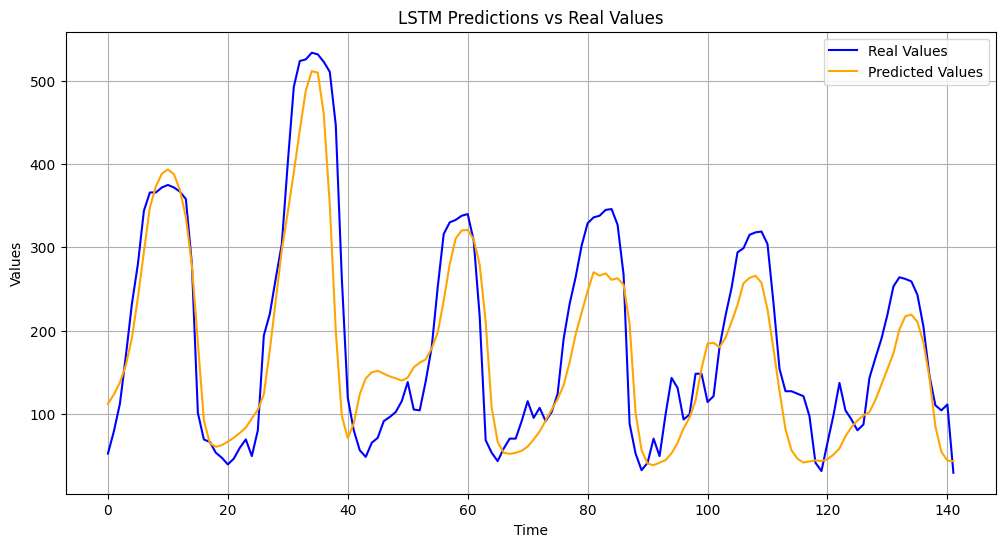

MAE: 44.07263081510302
MSE: 3233.3143460281253


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Data Preparation
scaler = MinMaxScaler()

# Scaling the target variable
serie_scaled = scaler.fit_transform(serie_sarimax.values.reshape(-1, 1))

# Preparing the input features (target and exogenous variables)
features = merged_df_train_seasonalized.values
features_scaled = MinMaxScaler().fit_transform(features)

# Defining a lookback window (e.g., 24 time steps)
lookback = 24
X, y = [], []

for i in range(lookback, len(serie_scaled)):
    X.append(features_scaled[i - lookback:i])  # Collecting features for each window
    y.append(serie_scaled[i])  # Target variable at time t

X, y = np.array(X), np.array(y)

# Train-test-validation split
split_index = 387  # Train-test split from your SARIMAX example
val_split_index = int(split_index * 0.8)  # 80% train, 20% validation from training data

X_train, X_val = X[:val_split_index], X[val_split_index:split_index]
y_train, y_val = y[:val_split_index], y[val_split_index:split_index]

X_test, y_test = X[split_index:], y[split_index:]

# Building the Improved LSTM Model
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(lookback, X.shape[2])))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(GRU(32, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Fitting the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Making predictions
y_pred = model.predict(X_test)

# Rescaling predictions back to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Real Values", color="blue")
plt.plot(y_pred_rescaled, label="Predicted Values", color="orange")
plt.title("LSTM Predictions vs Real Values")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

# Displaying MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)

print(f"MAE: {mae}")
print(f"MSE: {mse}")


In [23]:
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
mape

0.330666462308534

# CNN 

Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 0.1096 - mae: 0.2565 - mse: 0.1096 - val_loss: 0.0381 - val_mae: 0.1580 - val_mse: 0.0381
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0585 - mae: 0.2059 - mse: 0.0585 - val_loss: 0.0349 - val_mae: 0.1475 - val_mse: 0.0349
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0463 - mae: 0.1726 - mse: 0.0463 - val_loss: 0.0286 - val_mae: 0.1328 - val_mse: 0.0286
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0319 - mae: 0.1436 - mse: 0.0319 - val_loss: 0.0223 - val_mae: 0.1166 - val_mse: 0.0223
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0207 - mae: 0.1100 - mse: 0.0207 - val_loss: 0.0211 - val_mae: 0.1162 - val_mse: 0.0211
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0138 - mae: 0.0906 - mse: 0.0138 - val_loss: 0.0199 - val_mae: 0.1123 - val_mse: 0.0199
Epoch 7/50
10/10 [=========

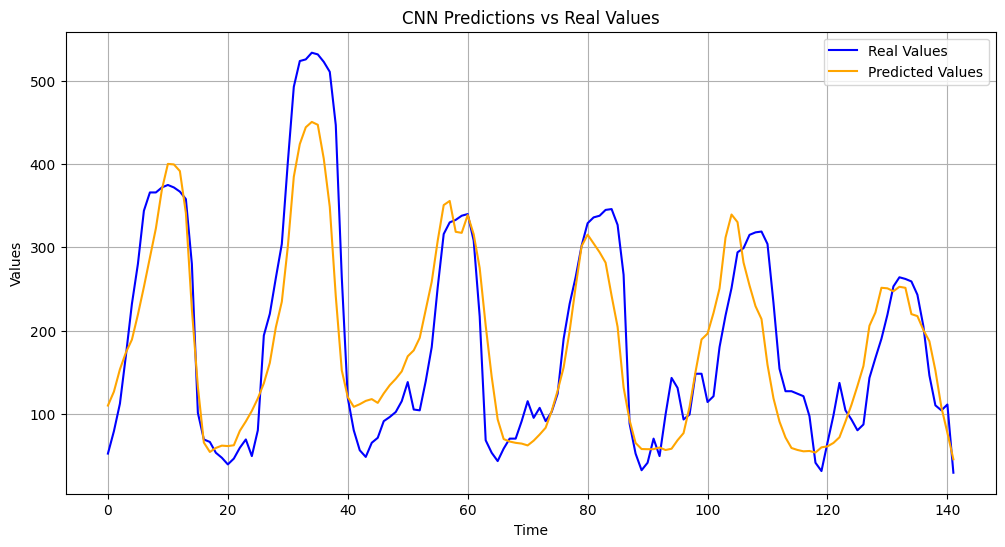

MAE: 47.33884370830697
MSE: 3647.5554395021527
MAPE: 0.3367398238813574


In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Data Preparation
scaler = MinMaxScaler()

# Scaling the target variable
serie_scaled = scaler.fit_transform(serie_sarimax.values.reshape(-1, 1))

# Preparing the input features (target and exogenous variables)
features = merged_df_train_seasonalized.values
features_scaled = MinMaxScaler().fit_transform(features)

# Defining a lookback window (e.g., 24 time steps)
lookback = 24
X, y = [], []

for i in range(lookback, len(serie_scaled)):
    X.append(features_scaled[i - lookback:i])  # Collecting features for each window
    y.append(serie_scaled[i])  # Target variable at time t

X, y = np.array(X), np.array(y)

# Train-test-validation split
split_index = 387  # Train-test split from your SARIMAX example
val_split_index = int(split_index * 0.8)  # 80% train, 20% validation from training data

X_train, X_val = X[:val_split_index], X[val_split_index:split_index]
y_train, y_val = y[:val_split_index], y[val_split_index:split_index]

X_test, y_test = X[split_index:], y[split_index:]

# Building the CNN Model
model = Sequential()

# Adding CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(lookback, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Adding Dense layers
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fitting the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Making predictions
y_pred = model.predict(X_test)

# Rescaling predictions back to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Real Values", color="blue")
plt.plot(y_pred_rescaled, label="Predicted Values", color="orange")
plt.title("CNN Predictions vs Real Values")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

# Displaying MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}")
